# Census income dataset
link do zbioru danych oraz ich opisu: https://www.apispreadsheets.com/datasets/106
## Eksploracja danych

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12, 8)})
sns.set_theme(style="ticks")
sns.set_context("talk")

sns.set_palette("colorblind")

### Wczytanie danych

Wiemy, że dane zawierają '?' zamiast nulli w danych kategorycznych oraz -100000 w danych numerycznych.

In [3]:
data = pd.read_csv('census_income_dataset.csv')
attrib = pd.read_csv('attributes_census_income.csv')

data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48838,64,?,321403.0,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48839,38,Private,374983.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
48840,44,Private,83891.0,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [4]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(attrib)

,name,type,description
0,age,integer,age of individual
1,workclass,string,"Values: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked"
2,fnlwgt,float,Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups
3,education,string,"Values: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool"
4,education_num,integer,NaN
5,marital_status,string,"Values: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse"
6,occupation,string,"Values: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces"
7,relationship,string,"Values: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried"
8,race,string,"Values: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black"
9,sex,string,"Values: Female, Male"


In [5]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Widzimy, że nie ma żadnych braków w zmiennych numerycznych (patrzymy na wartość `min` dla każdej kolumny). <br />
`capital_gain` i `capital_loss` to w większości zera i kilka outlierów.

In [6]:
# zamiana znaków zapytania na null

data = data.replace({"?": np.nan})

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       46043 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education_num   48842 non-null  int64  
 5   marital_status  48842 non-null  object 
 6   occupation      46033 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital_gain    48842 non-null  float64
 11  capital_loss    48842 non-null  float64
 12  hours_per_week  48842 non-null  float64
 13  native_country  47985 non-null  object 
 14  income_level    48842 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 5.6+ MB


Teraz widzimy, że brakuje wartości w kolumnach workclass, occupation oraz native_country.

In [8]:
data = data.dropna().reset_index(drop=True)

data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,245211.0,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,215419.0,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,374983.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,83891.0,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


Ponieważ, mamy dużo danych a wierszy z brakującymi danymi jest około 3500, to usuwamy wszystkie wybrakowane wiersze.

Zauważmy, że osób zarabiających mniej niż 50 tys. jest około 3 razy więcej niż osób zarabiających ponad 50 tys., co może mieć wpływ przy podziale na zbiory treningowe i testowe.

<=50K    34014
>50K     11208
Name: income_level, dtype: int64


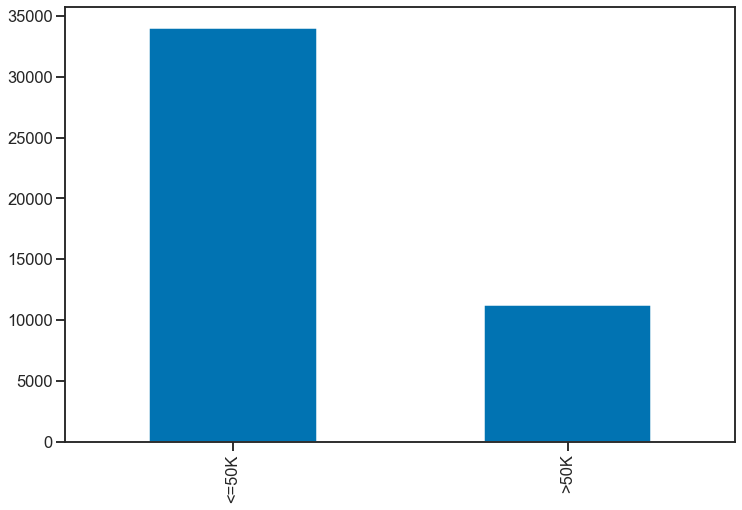

In [9]:
data.income_level.value_counts().plot(kind="bar")
print(data.income_level.value_counts())

plt.show()

### Rozkłady zmiennych numerycznych

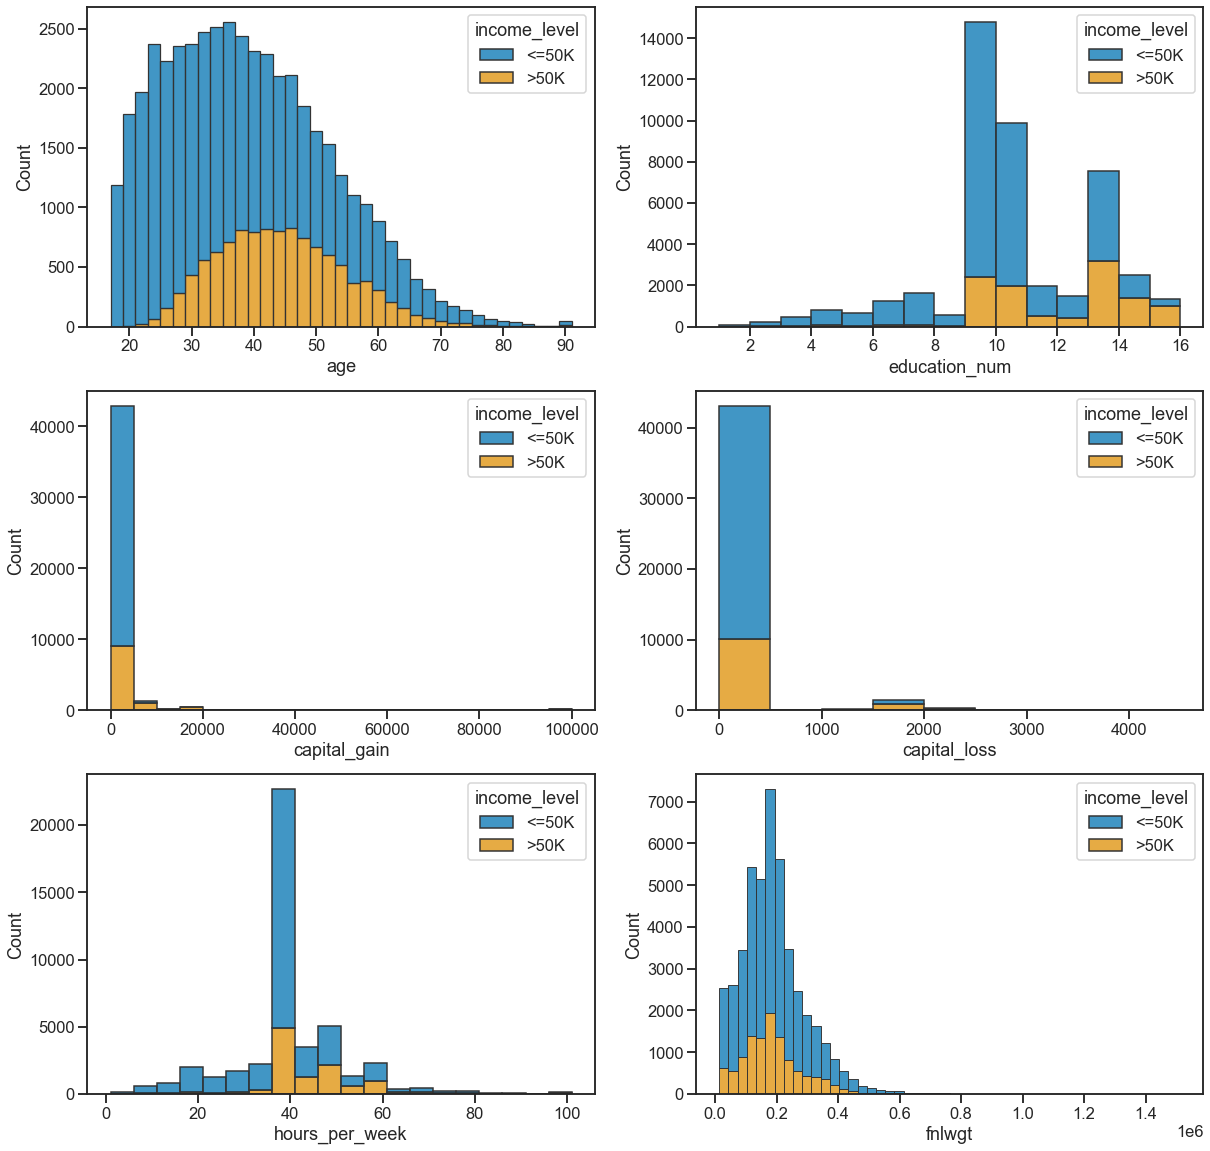

In [10]:
fig, ax = plt.subplots(3,2, figsize=(20, 20))

i = 0
j = 0
bin_widths = {'age': 2, 'education_num':1, 'capital_gain': 5000, 'capital_loss': 500, 'hours_per_week': 5, 'fnlwgt': 30000}

for column in ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'fnlwgt']:
    sns.histplot(data,
        x=column, hue="income_level",
        multiple="stack",
        edgecolor=".2",
        binwidth=bin_widths[column],
        ax=ax[j][i])
    i += 1
    if i % 2 == 0:
        j += 1
        i = 0
    
plt.show()

Możliwe, że dobrym pomysłem będzie połączenie kolumn `capital_gain` i `capital_loss` w jedną, która będzie ich różnicą. <br />
W kolumnie `education_num` wybija się kilka wartości 9-10 oraz 13-14, w przedziale 1-8 dominują osoby zarabiąjące mniej niż 50 tys. <br /> Wraz z poziomem edukacji oraz wiekiem wzrastają zarobki. <br />
Wartość `fnlwgt` rozkłada się bardzo podobnie w obu kategoriach, możliwe że tę kolumnę będzie można pominąć.

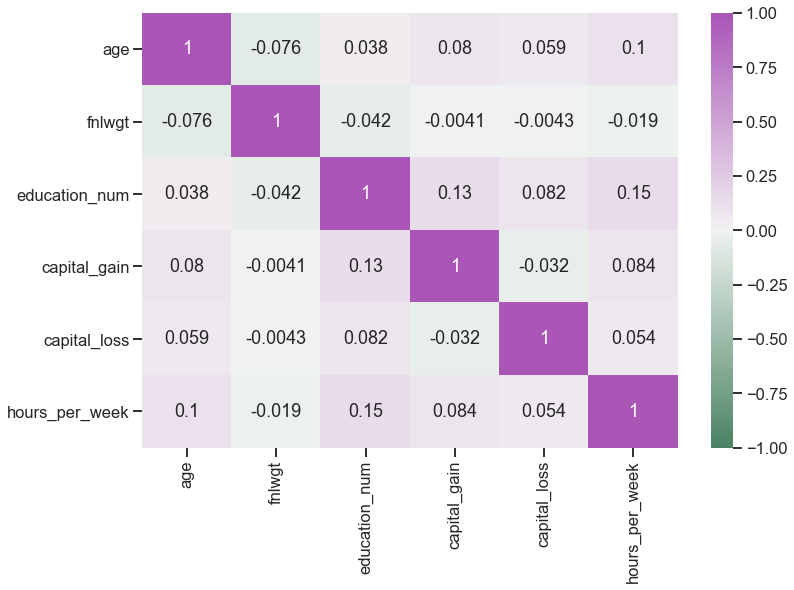

In [11]:
corr_cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

corrMatrix = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True, cmap=corr_cmap)

plt.show()

Zmienne nie są ze sobą skorelowane.

In [12]:
income_level_encoder = lambda x: 1 if x == ">50K" else 0

data['income_level_encoded'] = data['income_level'].apply(income_level_encoder)

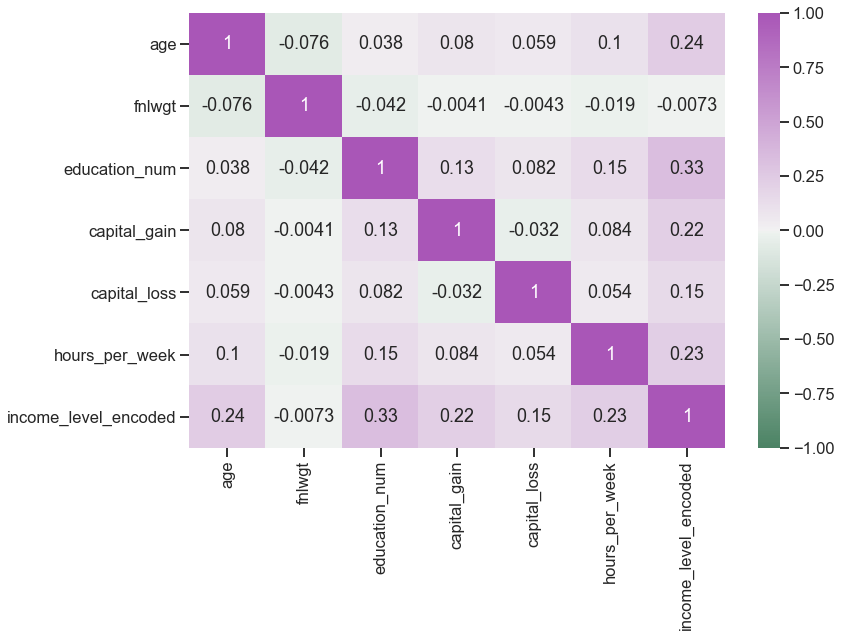

In [13]:
corrMatrix = data.select_dtypes(include=['float64', 'int64']).corr()

sns.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, cmap=corr_cmap)

plt.show()

Najwyższy współczynnik korelacji jest dla `education_num`.
Bardzo podobny współczynnik korelacji wsytępuje dla `age`, `hours_per_week` oraz `capital_gain`.

### Boxploty dla zmiennych numerycznych i `income_level`

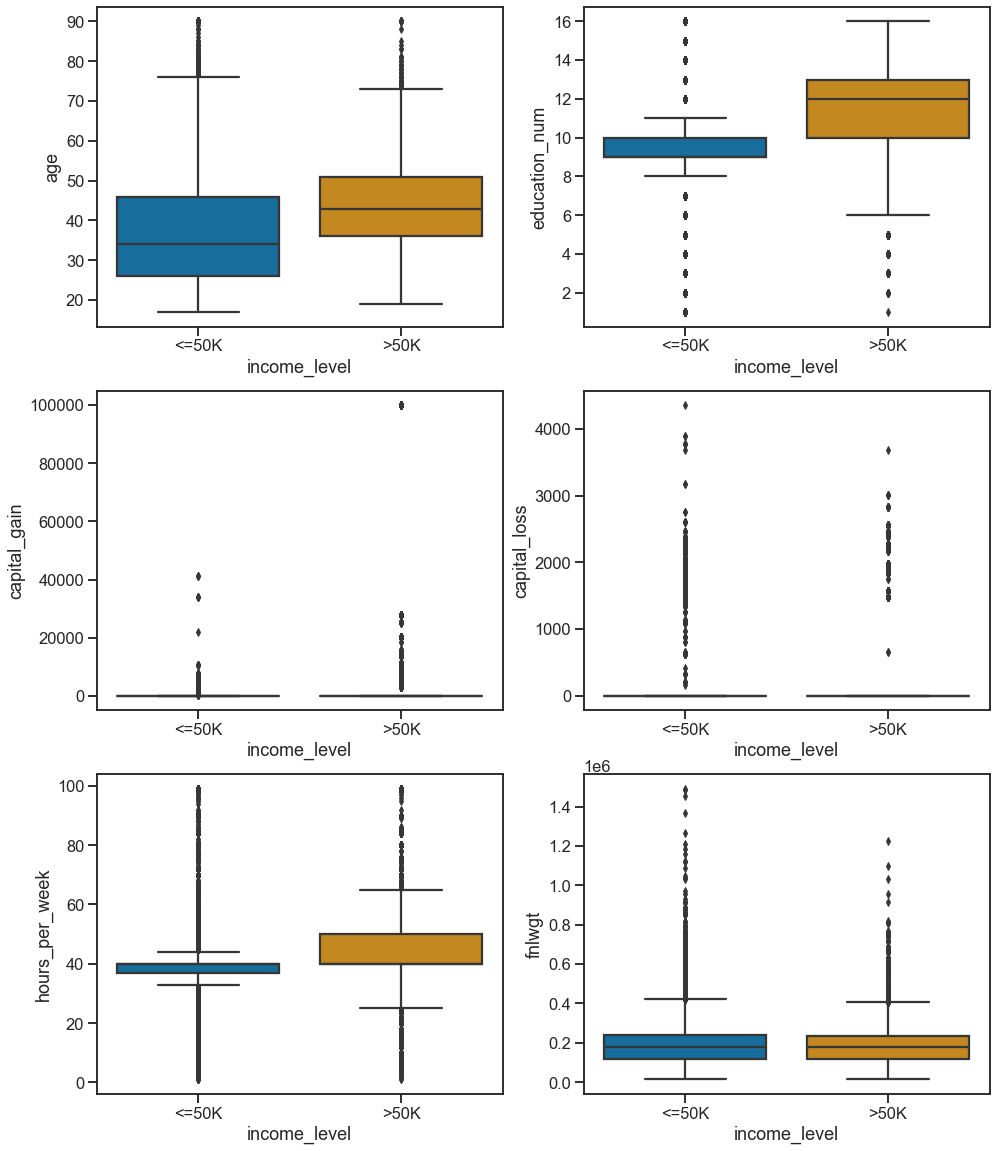

In [14]:
fig, ax = plt.subplots(3,2, figsize=(16, 20))
i = 0
j = 0
for column in ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'fnlwgt']:
    sns.boxplot(data=data, x='income_level', y=column, ax=ax[j][i])
    i += 1
    if i % 2 == 0:
        j += 1
        i = 0
        
plt.show()

Wyciągamy podobne wnioski jak przy wcześniejszych wykresach.
`education_num`, `hours_per_week` mają znaczny wpływ na zarobki. Obserwujemy też, że wraz z wiekiem pensje rosną.

### Analiza kolumn kategorycznych

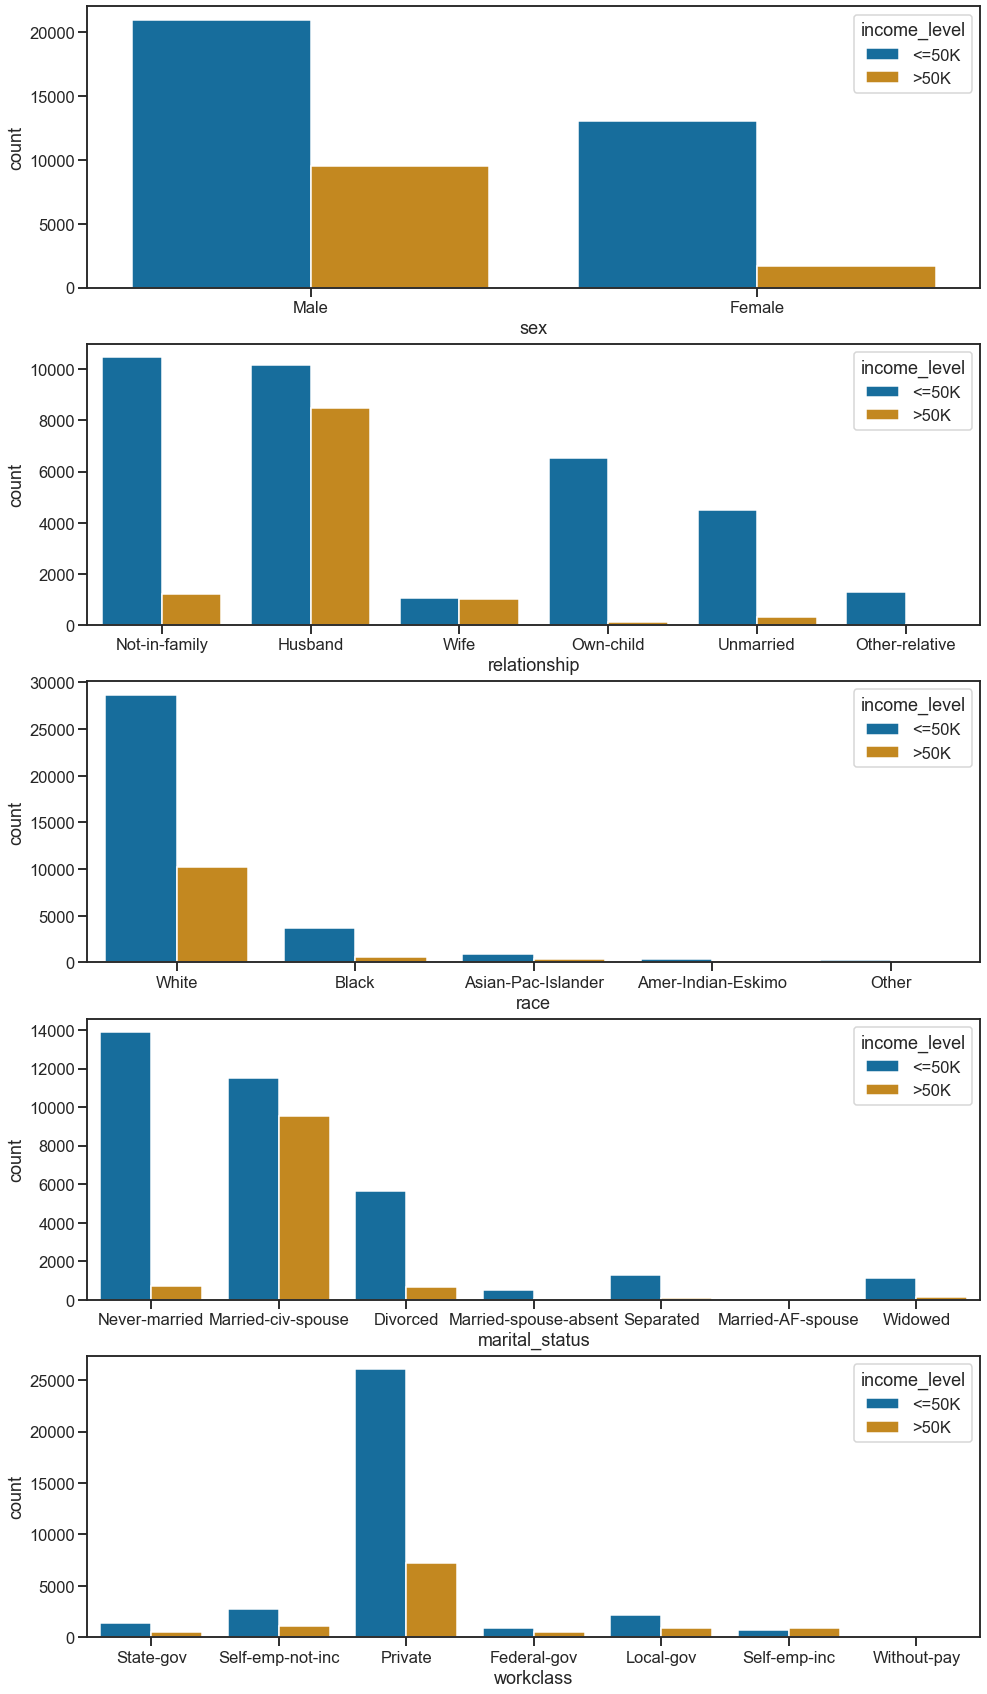

In [15]:
fig, ax = plt.subplots(5, figsize=(16, 30))
i = 0
for col in ['sex', 'relationship', 'race', 'marital_status', 'workclass']:
    sns.countplot(data=data, hue=data['income_level'], x=col, ax=ax[i])
    i += 1
    
plt.show()

1. Bardzo duża dysproporcja co do liczby obserwacji w kolumnach `race`, `marital_status` oraz `workclass`.
2. Biorąc pod uwagę poniższe wykresy, mozliwe że w przypdaku rasy warto będzie zgrupować wartości do dwóch kategorii (White, Asian-Pac-Islander) oraz reszta w drugiej kategorii.
2. Podobnie w przypadku kolumny `marital_status` można do jednej grupy wrzucić Married-civ-spouse, Married-AF-spouse, a resztę do drugiej.
3. W przypadku `workclass` możliwe, że warto dodać stopniowanie.

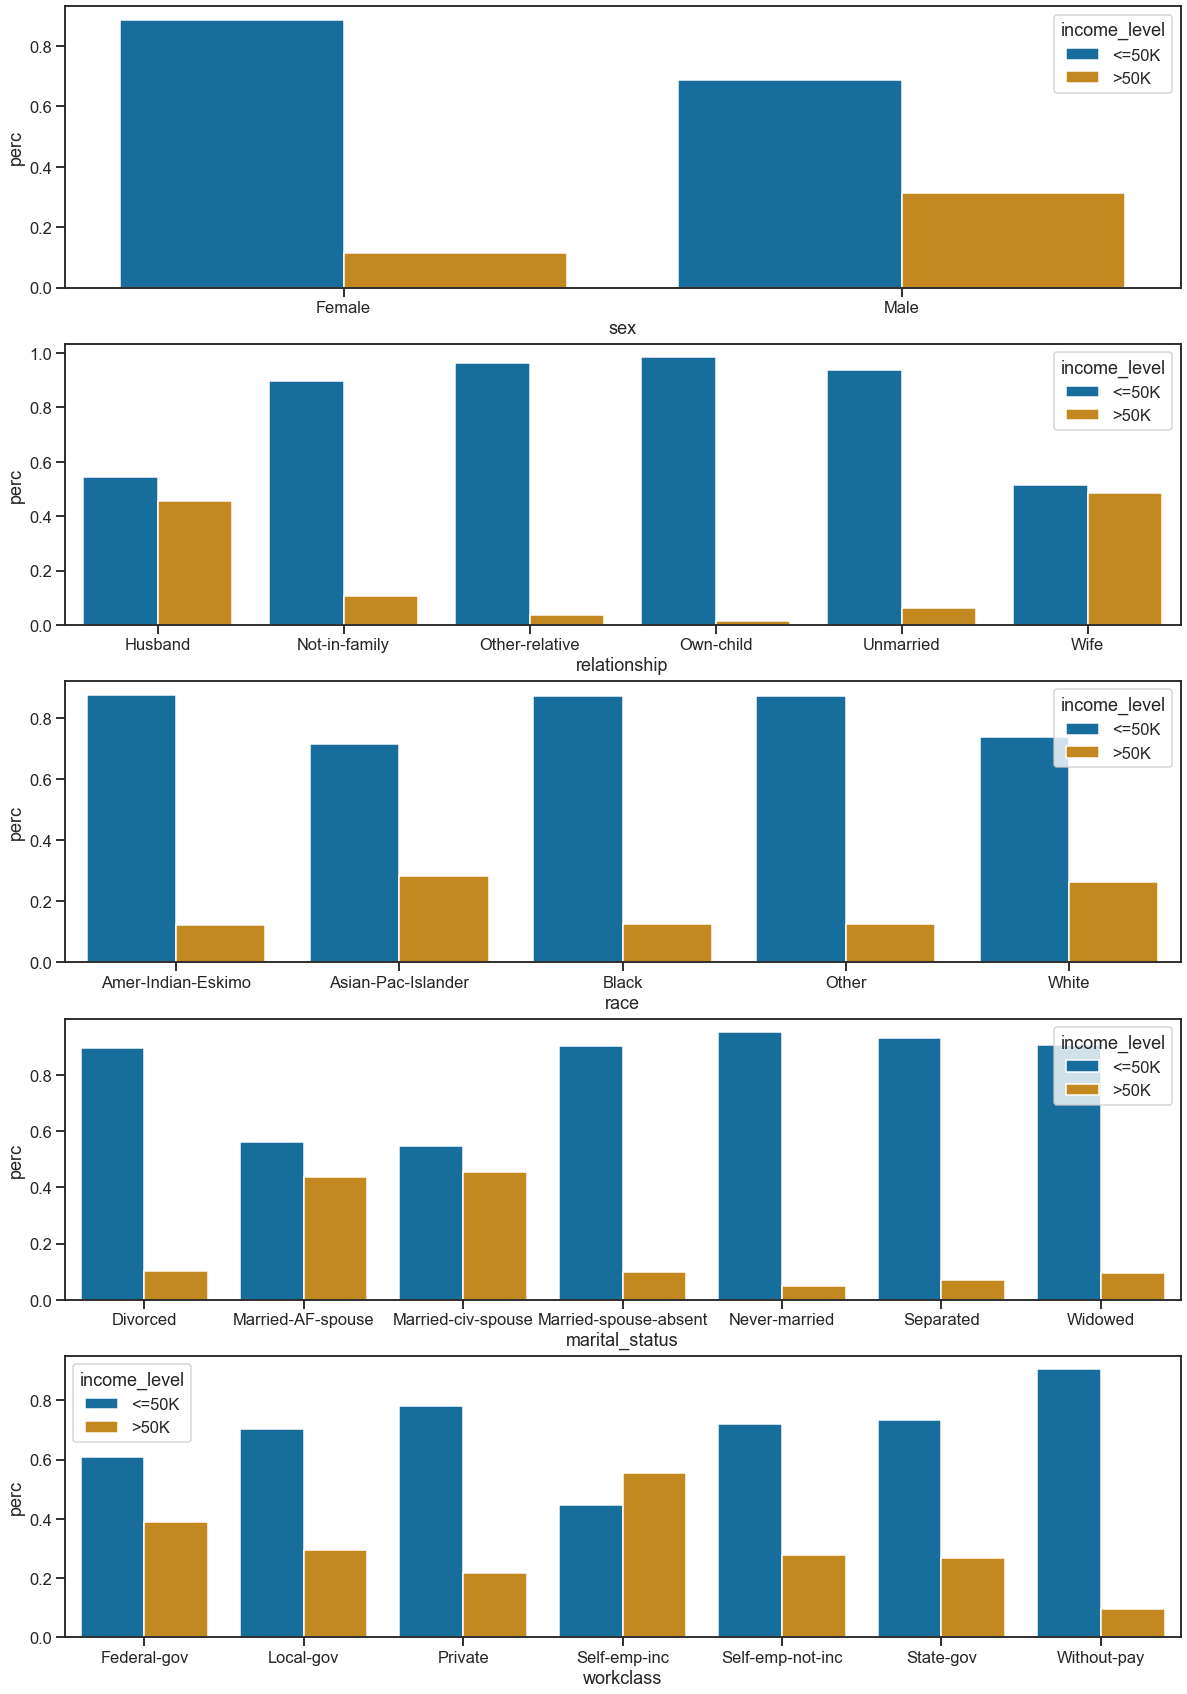

In [16]:
hue, y = 'income_level', 'perc'

fig, ax = plt.subplots(5, figsize=(20, 30))
i = 0

for col in ['sex', 'relationship', 'race', 'marital_status', 'workclass']:
    
    prop_df = (data[hue]
               .groupby(data[col])
               .value_counts(normalize=True)
               .rename(y)
               .reset_index())

    sns.barplot(x=col, y=y, hue=hue, data=prop_df, ax=ax[i])
    i += 1

plt.show()

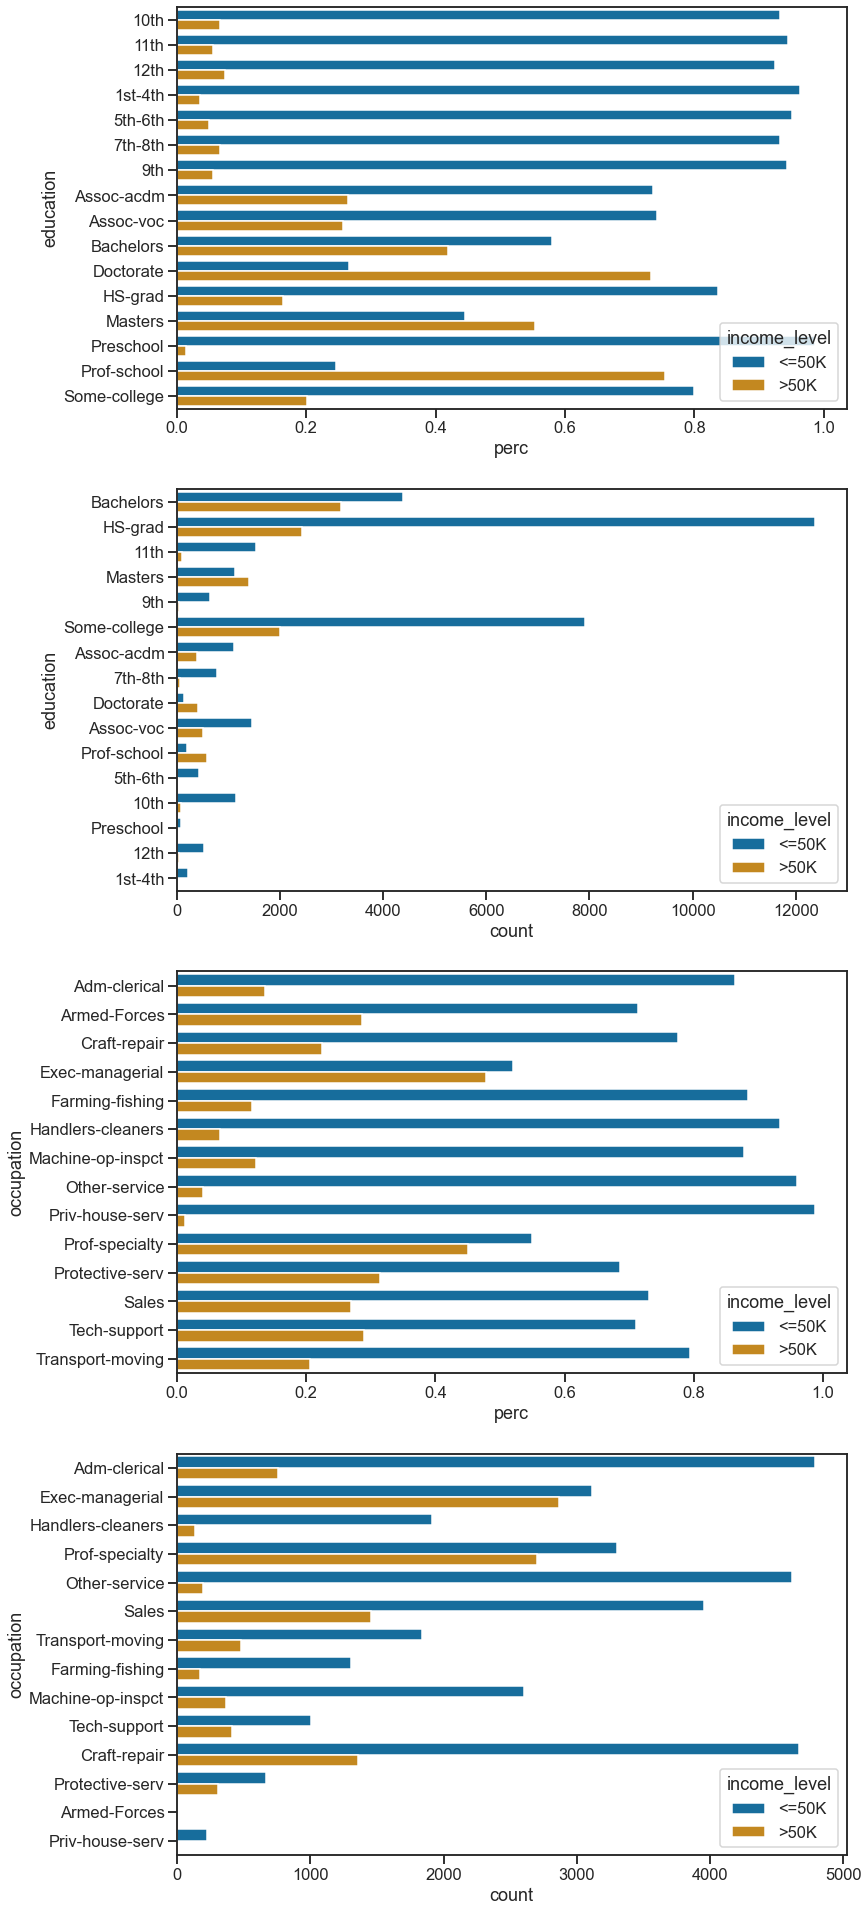

In [17]:
hue, y = 'income_level', 'perc'

fig, ax = plt.subplots(4, figsize=(12, 34))
i = 0

for col in ['education', 'occupation']:
    
    prop_df = (data[hue]
               .groupby(data[col])
               .value_counts(normalize=True)
               .rename(y)
               .reset_index())

    sns.barplot(x=y, y=col, hue=hue, data=prop_df, ax=ax[i])
    sns.countplot(data=data, hue=hue, y=col, ax=ax[i + 1])
    i += 2

plt.show()

1. Kolumna `education` prawdopodobnie jest zbędna ponieważ mamy `education_num`.
2. W przypadku `occupation` nie ma aż tak drastycznych różnic w liczbach obserwacji między kategoriami, tutaj możliwe, że też przyda się stopniowanie lub zgrupowanie.
3. Można potencjalnie zgrupować też kategorie w edukacji, które są poniżej szkoły średniej.

#### Kolumna `native_country`

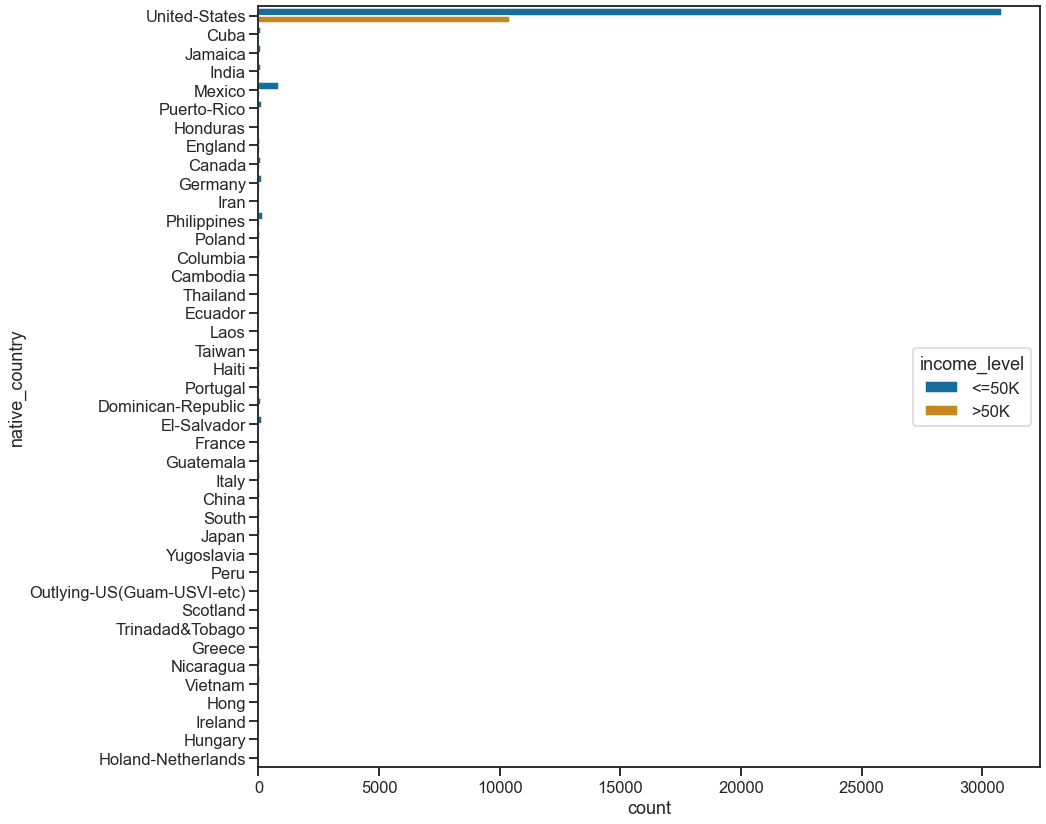

In [18]:
fig, ax = plt.subplots(1, figsize=(14, 14))
sns.countplot(data=data, hue=hue, y='native_country', ax=ax)

plt.show()

Danych z krajami innymi niż Stany Zjednoczone i Meksyk jest tak mało, że powinniśmy się zastanowić czy ich nie pominąć.